# HTML5 Matplotlib animations in SMC

In [20]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

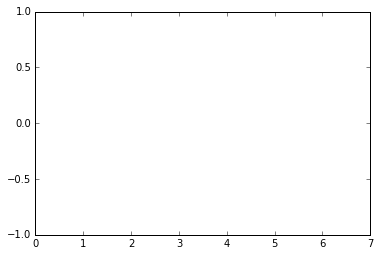

In [29]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init, interval=25, blit=True)

## Saving the animation in a "WebM" file

In [30]:
filename = 'animation.webm'
anim.save(filename, fps=6, extra_args=['-vcodec', 'libvpx'])

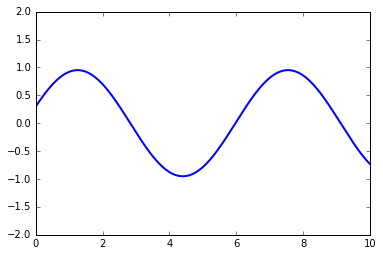

In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.1 * np.pi) * np.sin(x - i * 0.1 * np.pi))
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, interval=100, blit=True)
anim.save('animation.webm', fps=6, extra_args=['-vcodec', 'libvpx'])

In [ ]:
from IPython.display import HTML
HTML('<video loop controls autoplay src="')

## Retrieving our project id in SMC

Which is in the path of the current directory we're in. Then we use it to construct the URL to the video file.

In [33]:
import os
dirs = os.getcwd().split('/')
project_id = dirs[2]
path = '/'.join(dirs[3:])
url = "/{project_id}/raw/{path}/{filename}".format(**locals())
print(url)

/14eed217-2d3c-4975-a381-b69edcb40e0e/raw/scratch/animation.webm


In [32]:
from IPython.display import HTML
HTML('''<video autoplay controls loop>
<source src="{url}" type="video/webm">
</video>'''.format(url = url))